In [13]:
import seaborn as sns, pandas as pd, numpy as np
import serde.textline

In [34]:
def parse_data(infile):
    lines = serde.textline.deser(infile, trim=True)
    (header,) = list(set(line[4:] for line in lines if line.startswith("***")))
    header = header.split(",")
    data = [line[4:-1] for line in lines if line.startswith("**-")]

    df = pd.DataFrame(
        [
            {
                k: float(v)
                if k
                in [
                    "duration",
                    "nentdb",
                    "numthreads",
                    "ncpus",
                    "batchsize",
                    "maxentsize",
                ]
                else v
                for k, v in zip(header, line.split(","))
            }
            for line in data
        ]
    )
    return df


basedir = "scripts/exp/benchio/"
df_local = parse_data(basedir + "bench_thread_client_threadlocal.txt")
df_localnew = parse_data(basedir + "bench_thread_client_threadlocal_2.txt")
df_mutex = parse_data(basedir + "bench_thread_client_mutex.txt")
df_proc = parse_data(basedir + "bench_process.txt")

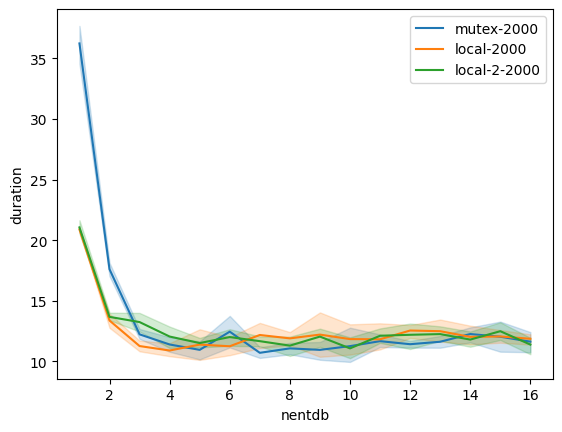

In [35]:
for entsize in [1000, 2000][1:]:
    sns.lineplot(
        x="nentdb",
        y="duration",
        data=df_mutex[df_mutex["maxentsize"] == entsize],
        label=f"mutex-{entsize}",
    )
    sns.lineplot(
        x="nentdb",
        y="duration",
        data=df_local[df_local["maxentsize"] == entsize],
        label=f"local-{entsize}",
    )
    sns.lineplot(
        x="nentdb",
        y="duration",
        data=df_localnew[df_localnew["maxentsize"] == entsize],
        label=f"local-2-{entsize}",
    )
    # sns.lineplot(
    #     x="ncpus",
    #     y="duration",
    #     data=df_proc[df_proc["maxentsize"] == entsize],
    #     label=f"process-{entsize}",
    # )